# ABOUT DATASET



# Geographic and Outcome analyzing

# Question 
   # 1.Demographics:
       # What is the distribution of age and gender,ethicnicity,admission type,marital status among the 100 patients?
       # Are there any notable differences in age or gender between different patient groups or outcomes?
    
   # 2.	Clinical Outcomes:
       # What are the mortality rates among the 100 patients? Are there any significant patterns or trends?
       # How does the length of stay vary across different patient groups or diagnoses?
       # Are there any specific diagnoses or conditions associated with higher mortality rates or longer stays?
   # 3. Survival Analysis
       # How many percent patient die sfter a certain day in hospital?
       # Is there any relation between age,gender,ventilation with the in survival ?

In [1]:
# Import package 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt 
import seaborn as sns
%matplotlib inline

In [2]:
# read csv file 
df=pd.read_csv('GeoOutCome.csv')
df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob
0,41976,176016,1/31/2199 22:26,2/14/2199 13:22,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,7/28/2136 0:00
1,10106,133283,9/14/2161 22:22,9/19/2161 17:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,12/16/2097 0:00
2,10029,132349,9/22/2139 10:58,10/2/2139 14:29,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,4/10/2061 0:00
3,44212,163189,11/24/2123 14:14,12/30/2123 14:31,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,6/16/2078 0:00
4,41976,173269,1/13/2199 17:13,1/16/2199 15:23,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,HYPOTENSION;UNRESPONSIVE,0,70.57,M,7/28/2136 0:00


# Explore Data

In [3]:
# check the shape of df
df.shape

(129, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            129 non-null    int64  
 1   hadm_id               129 non-null    int64  
 2   admittime             129 non-null    object 
 3   dischtime             129 non-null    object 
 4   deathtime             40 non-null     object 
 5   admission_type        129 non-null    object 
 6   admission_location    129 non-null    object 
 7   discharge_location    129 non-null    object 
 8   marital_status        113 non-null    object 
 9   ethnicity             129 non-null    object 
 10  diagnosis             129 non-null    object 
 11  hospital_expire_flag  129 non-null    object 
 12  total_LOS             129 non-null    float64
 13  gender                129 non-null    object 
 14  dob                   129 non-null    object 
dtypes: float64(1), int64(2)

In [5]:
df.describe()

,subject_id,hadm_id,total_LOS
count,129.000000,129.000000,129.000000
mean,28010.410853,152343.441860,219.606899
std,16048.502883,27858.788248,298.531278
min,10006.000000,100375.000000,2.540000
25%,10088.000000,128293.000000,79.560000
50%,40310.000000,157235.000000,154.150000
75%,42135.000000,174739.000000,255.390000
max,44228.000000,199395.000000,2975.650000


In [6]:
df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'marital_status', 'ethnicity', 'diagnosis', 'hospital_expire_flag',
       'total_LOS', 'gender', 'dob'],
      dtype='object')

In [7]:
df['admittime']=pd.to_datetime(df['admittime'])
df['dischtime']=pd.to_datetime(df['dischtime'])
df['deathtime']=pd.to_datetime(df['deathtime'])
df['dob']=pd.to_datetime(df['dob'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subject_id            129 non-null    int64         
 1   hadm_id               129 non-null    int64         
 2   admittime             129 non-null    datetime64[ns]
 3   dischtime             129 non-null    datetime64[ns]
 4   deathtime             40 non-null     datetime64[ns]
 5   admission_type        129 non-null    object        
 6   admission_location    129 non-null    object        
 7   discharge_location    129 non-null    object        
 8   marital_status        113 non-null    object        
 9   ethnicity             129 non-null    object        
 10  diagnosis             129 non-null    object        
 11  hospital_expire_flag  129 non-null    object        
 12  total_LOS             129 non-null    float64       
 13  gender              

In [9]:
df['deathtime'].fillna('alive',inplace=True)
df['marital_status'].fillna('Unknown',inplace=True)


In [10]:
df.head(10)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob
0,41976,176016,2199-01-31 22:26:00,2199-02-14 13:22:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,2136-07-28
1,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,2097-12-16
2,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,2061-04-10
3,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,alive,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,2078-06-16
4,41976,173269,2199-01-13 17:13:00,2199-01-16 15:23:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,HYPOTENSION;UNRESPONSIVE,0,70.57,M,2136-07-28
5,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,FEVER,1,173.52,F,2061-03-25
6,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SINGLE,WHITE,CHOLANGITIS,0,230.72,F,2112-10-22
7,41976,125013,2201-09-28 16:47:00,2201-10-01 15:53:00,alive,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,71.36,M,2136-07-28
8,41976,151798,2202-02-15 19:01:00,2202-02-19 16:42:00,alive,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,UTI/PYELONEPHRITIS,0,93.66,M,2136-07-28
9,40655,126002,2144-07-18 19:32:00,2144-07-28 14:41:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,WIDOWED,WHITE,CELLULITIS,0,235.15,F,1844-07-18


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subject_id            129 non-null    int64         
 1   hadm_id               129 non-null    int64         
 2   admittime             129 non-null    datetime64[ns]
 3   dischtime             129 non-null    datetime64[ns]
 4   deathtime             129 non-null    object        
 5   admission_type        129 non-null    object        
 6   admission_location    129 non-null    object        
 7   discharge_location    129 non-null    object        
 8   marital_status        129 non-null    object        
 9   ethnicity             129 non-null    object        
 10  diagnosis             129 non-null    object        
 11  hospital_expire_flag  129 non-null    object        
 12  total_LOS             129 non-null    float64       
 13  gender              

In [12]:
columns = df.columns
columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'marital_status', 'ethnicity', 'diagnosis', 'hospital_expire_flag',
       'total_LOS', 'gender', 'dob'],
      dtype='object')

In [13]:
for i in columns:
    print (df[i].unique())

[41976 10106 10029 44212 10045 44228 40655 10013 10019 10036 10056 10088
 44154 10094 43881 10065 43798 44083 43746 10101 10132 10033 40310 10102
 42231 40304 10044 10046 10083 42412 10069 10040 40601 42075 43827 10042
 10093 40503 42199 43927 10112 44222 10027 10061 10111 10114 42033 42346
 40456 43748 10026 10089 10035 10130 10074 10011 10120 10126 42430 43870
 42302 10043 40687 41795 43879 10124 42066 42458 10076 10117 40124 43909
 42275 10059 42281 42135 10119 40612 40177 43735 40595 10104 40204 42321
 10064 40286 10098 40277 43779 42367 10067 10017 10032 10006 10090 10038
 41914 41983 10127 42292]
[176016 133283 132349 163189 173269 126949 103379 125013 151798 126002
 165520 177759 189483 100375 169938 149044 149469 153826 174245 122928
 125449 130681 180546 155297 179418 167021 183314 130870 125157 167181
 142539 197611 157235 157609 164869 171878 174997 124073 133110 186361
 134993 114867 168074 146672 157839 182879 151323 149950 148562 168233
 165393 168803 178513 110958 172454

I can see the inconsistent in the column hospital_expire_flag. In this column '1' represent for death person, '0' for alive. SO I will change the ' MI"' ' RENAL FAILURE"' 'PRE HYDRATION"' to '0'

The same situation with marital_status cloumns. There are 2 columns 'Unknown' 'UNKNOWN (DEFAULT)'. I wiil convert to one value Unknown

In [14]:
# clean the hospital_expire_flag and marital status columns

df['hospital_expire_flag'].replace([' MI"',' RENAL FAILURE"','PRE HYDRATION"'],0,inplace=True)

df['marital_status'].replace('UNKNOWN (DEFAULT)','Unknown',inplace=True)

In [15]:
df['hospital_expire_flag']=df['hospital_expire_flag'].astype(int)


In [16]:
df['hospital_expire_flag'].unique()

array([0, 1])

Now the data is clean. 

# Structure Data 

In [17]:
df.head(10)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob
0,41976,176016,2199-01-31 22:26:00,2199-02-14 13:22:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,2136-07-28
1,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,2097-12-16
2,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,2061-04-10
3,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,alive,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,2078-06-16
4,41976,173269,2199-01-13 17:13:00,2199-01-16 15:23:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,HYPOTENSION;UNRESPONSIVE,0,70.57,M,2136-07-28
5,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,FEVER,1,173.52,F,2061-03-25
6,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SINGLE,WHITE,CHOLANGITIS,0,230.72,F,2112-10-22
7,41976,125013,2201-09-28 16:47:00,2201-10-01 15:53:00,alive,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,71.36,M,2136-07-28
8,41976,151798,2202-02-15 19:01:00,2202-02-19 16:42:00,alive,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,UTI/PYELONEPHRITIS,0,93.66,M,2136-07-28
9,40655,126002,2144-07-18 19:32:00,2144-07-28 14:41:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,WIDOWED,WHITE,CELLULITIS,0,235.15,F,1844-07-18


In [18]:
# Create a age column

df['age']= df['admittime'].dt.year - df['dob'].dt.year

In [19]:
df.head(20)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob,age
0,41976,176016,2199-01-31 22:26:00,2199-02-14 13:22:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,2136-07-28,63
1,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,2097-12-16,64
2,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,2061-04-10,78
3,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,alive,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,2078-06-16,45
4,41976,173269,2199-01-13 17:13:00,2199-01-16 15:23:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,HYPOTENSION;UNRESPONSIVE,0,70.57,M,2136-07-28,63
5,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,FEVER,1,173.52,F,2061-03-25,68
6,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SINGLE,WHITE,CHOLANGITIS,0,230.72,F,2112-10-22,58
7,41976,125013,2201-09-28 16:47:00,2201-10-01 15:53:00,alive,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,71.36,M,2136-07-28,65
8,41976,151798,2202-02-15 19:01:00,2202-02-19 16:42:00,alive,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,UTI/PYELONEPHRITIS,0,93.66,M,2136-07-28,66
9,40655,126002,2144-07-18 19:32:00,2144-07-28 14:41:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,WIDOWED,WHITE,CELLULITIS,0,235.15,F,1844-07-18,300


In [20]:
df['age'].dtype

dtype('int64')

In [21]:
# check the unique value of age column

df['age'].unique()

array([ 63,  64,  78,  45,  68,  58,  65,  66, 300,  87,  49,  83,  62,
        53,  55,  81,  73,  41,  70,  86,  77,  82,  42,  72,  80,  71,
        88,  89,  79,  76,  52,  36,  27,  44,  84,  51,  69,  67,  20,
        29,  74,  28,  17], dtype=int64)

In [22]:
# assign df_median

df_median = int(np.percentile(df['age'],50))
df_median

73

In [23]:
# replace the value 300 to median of age

df['age'].replace(300,df_median,inplace=True)

In [24]:
# check the unique value of age column again

df['age'].unique()

array([63, 64, 78, 45, 68, 58, 65, 66, 73, 87, 49, 83, 62, 53, 55, 81, 41,
       70, 86, 77, 82, 42, 72, 80, 71, 88, 89, 79, 76, 52, 36, 27, 44, 84,
       51, 69, 67, 20, 29, 74, 28, 17], dtype=int64)

There is a patient with age is 300. That's abnormal. I will change it to mean

In [25]:
# read the ICU_unit

'''This is the table with the latest ICU unit of each patient'''
ICU_unit = pd.read_csv('ICU_care.csv')

In [26]:
ICU_unit.head()

,subject_id,last_careunit
0,10006,MICU
1,10011,MICU
2,10013,MICU
3,10017,CCU
4,10019,MICU


In [27]:
# read the Ventlation

''' This is the table update fo the ventilation patient'''

ICU_Ven = pd.read_csv('Ventilation.csv')

In [28]:
ICU_Ven.head()

,subject_id,ordercategoryname
0,40124,Ventilation
1,40310,Ventilation
2,40687,Ventilation
3,41795,Ventilation
4,41914,Ventilation


In [30]:

# create a dataframe df_patient for only unique patient information

df_patient = df.drop_duplicates(subset='subject_id')
df_patient.shape

(100, 16)

In [36]:
# merge 2 tables df_patient and ICU_unit

df_patient_ICU = pd.merge(df_patient, ICU_unit, on='subject_id', how='left')
df_patient_ICU = pd.merge(df_patient_ICU, ICU_Ven, on='subject_id', how='left')

df_patient_ICU.to_csv('mimic-iii.csv', index=False)



In [37]:
df_patient_ICU.shape

(100, 18)

In [42]:
df_patient_ICU.head(20)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob,age,last_careunit,ordercategoryname
0,41976,176016,2199-01-31 22:26:00,2199-02-14 13:22:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,2136-07-28,63,MICU,Ventilation
1,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,2097-12-16,64,MICU,Non-ventilation
2,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,2061-04-10,78,SICU,Non-ventilation
3,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,alive,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,2078-06-16,45,MICU,Ventilation
4,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,FEVER,1,173.52,F,2061-03-25,68,SICU,Non-ventilation
5,44228,103379,2170-12-15 03:14:00,2170-12-24 18:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,SINGLE,WHITE,CHOLANGITIS,0,230.72,F,2112-10-22,58,SICU,Non-ventilation
6,40655,126002,2144-07-18 19:32:00,2144-07-28 14:41:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,WIDOWED,WHITE,CELLULITIS,0,235.15,F,1844-07-18,73,MICU,Non-ventilation
7,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Unknown,UNKNOWN/NOT SPECIFIED,SEPSIS,1,63.60,F,2038-09-03,87,MICU,Non-ventilation
8,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,1,31.05,M,2114-06-20,49,MICU,Non-ventilation
9,10036,189483,2185-03-24 16:56:00,2185-03-26 09:15:00,2185-03-26 09:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,SEPSIS,1,43.36,F,1885-03-24,73,MICU,Non-ventilation


In [43]:
df_patient_ICU['ordercategoryname'].fillna('Non-ventilation',inplace=True)

In [44]:
df_patient_ICU.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob,age,last_careunit,ordercategoryname
0,41976,176016,2199-01-31 22:26:00,2199-02-14 13:22:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,2136-07-28,63,MICU,Ventilation
1,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,2097-12-16,64,MICU,Non-ventilation
2,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,2061-04-10,78,SICU,Non-ventilation
3,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,alive,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,2078-06-16,45,MICU,Ventilation
4,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,FEVER,1,173.52,F,2061-03-25,68,SICU,Non-ventilation


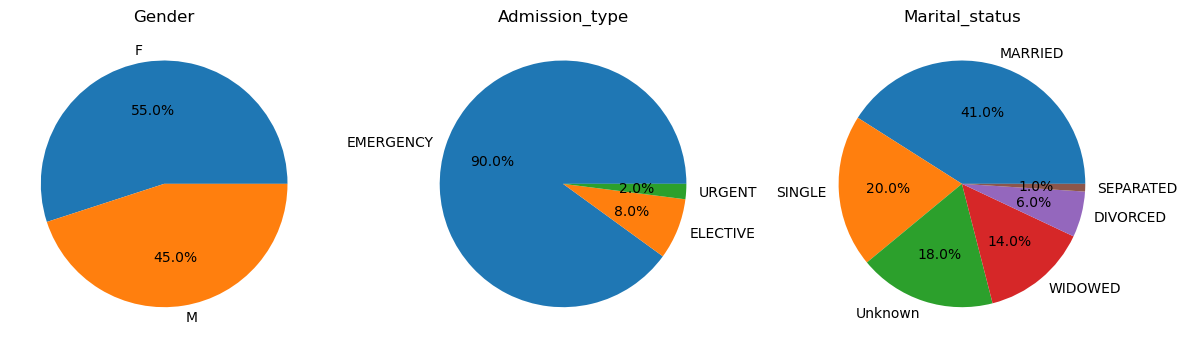

In [45]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Create subplots with 1 row and 3 columns

for i, column in enumerate(['gender', 'admission_type', 'marital_status']):
    i_count = df_patient_ICU[column].value_counts().reset_index()
    i_count.columns = [column, 'count']
    
    ax = axes[i]  # Get the current axis
    ax.pie(i_count['count'], labels=i_count[column], autopct='%1.1f%%')
    ax.set_title(column.capitalize())  # Set the subplot title

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


Insights:

- Females account for a higher percentile at 55% compared to males at 45% among the total number of patients.
- The majority of patients were admitted under emergency or urgent circumstances.
- In terms of marital status, the highest percentile belongs to married individuals, followed by single, unknown, and widowed statuses.

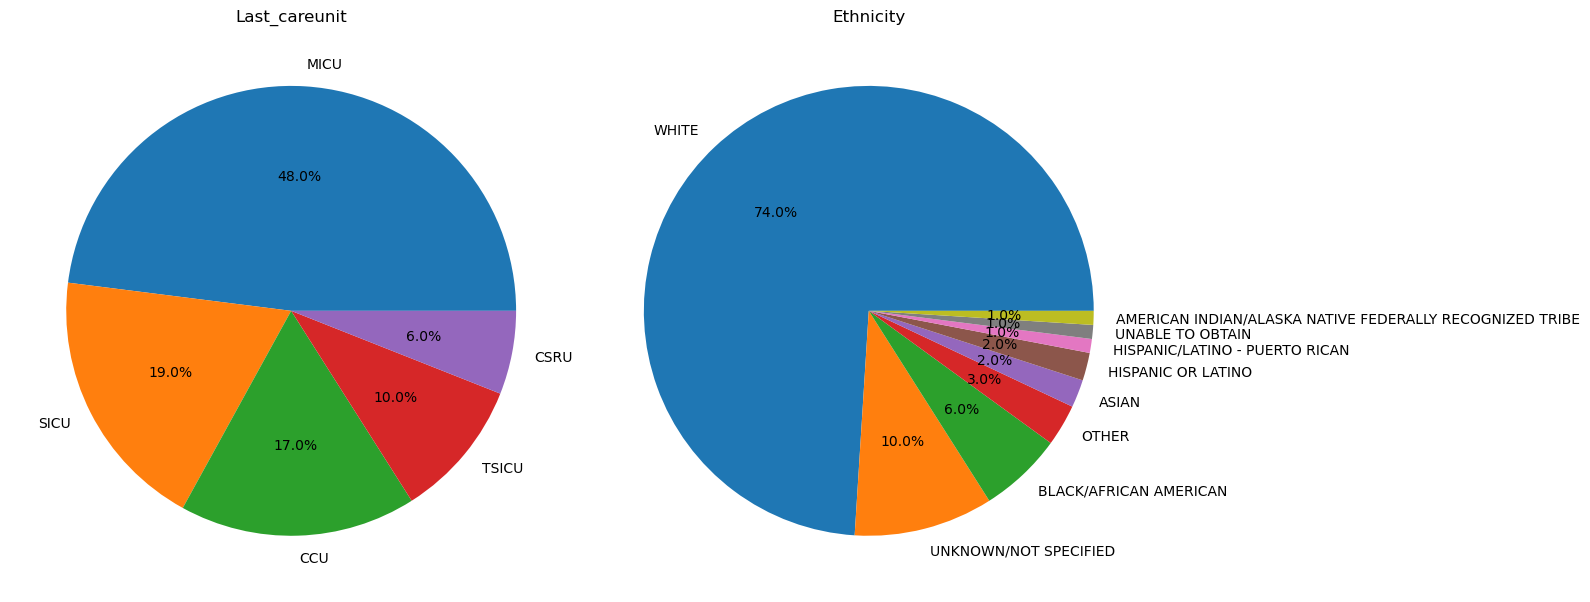

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create subplots with 1 row and 2 columns

for i, column in enumerate(['last_careunit','ethnicity']):
    i_count = df_patient_ICU[column].value_counts().reset_index()
    i_count.columns = [column, 'count']
    
    ax = axes[i]  # Get the current axis
    ax.pie(i_count['count'], labels=i_count[column], autopct='%1.1f%%')
    ax.set_title(column.capitalize())  # Set the subplot title

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()



Insights:

- Approximately half of the patients received treatment in the Medical Intensive Care Unit (MICU) with 48% of the total, followed by the Surgical ICU (SICU) at 19%, the Coronary Care Unit (CCU) at 17%, the Trauma/Surgical Intensive Care Unit (TSICU) at 10%, and the Cardiac Surgery Recovery Unit (CSRU) at 6%.

- Among the available racial data, White individuals represent the highest percentile at 74%, followed by the category of Unknown, Black/African American, and Asian.

C:\Users\linh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

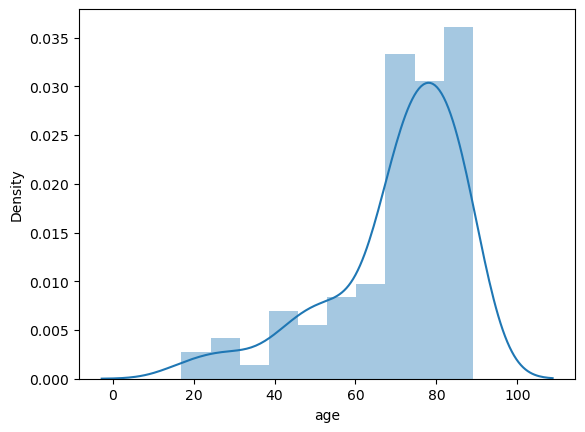

In [47]:
# histogram by age

sns.distplot(df_patient_ICU['age'])

Insights: The age distribution of the patients in the dataset is heavily concentrated in the 70s and 80s age range, indicating a higher prevalence of patients in these age groups.

# What are the mortality rates and lenght of stay among the 100 patients? Are there any significant patterns or trends?

In [48]:
# Mortality rate 


death_pts = 0

for i in df_patient_ICU['hospital_expire_flag']:
    if i == 1:
        death_pts +=1
print(death_pts/len(df_patient.value_counts())*100)

37.0


<AxesSubplot:xlabel='hospital_expire_flag', ylabel='average_LOS'>

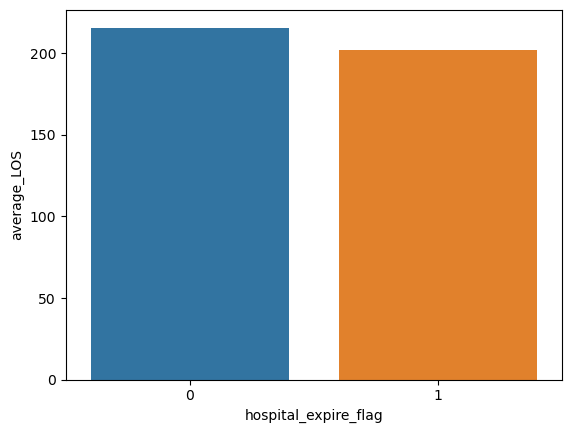

In [49]:
# lenght of stay of 2 group dead and survive 

df_patient_LOS = df_patient_ICU.groupby('hospital_expire_flag')['total_LOS'].mean().reset_index()

df_patient_LOS.columns = ['hospital_expire_flag','average_LOS']

df_patient_LOS

sns.barplot(x='hospital_expire_flag',y='average_LOS',data=df_patient_LOS)

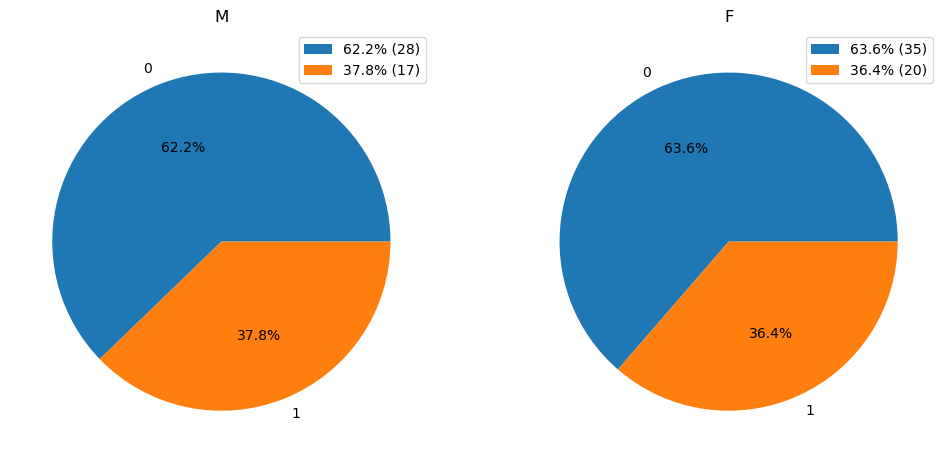

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, j in enumerate(df_patient_ICU['gender'].unique()):
    ax = axes[i]

    df_patient_ICU_gen = df_patient_ICU[df_patient_ICU['gender'] == j]
    value_counts = df_patient_ICU_gen['hospital_expire_flag'].value_counts()

    # Plot the pie chart with percentiles in the legend
    wedges, _, autopct_text = ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

    # Add percentiles to the legend
    perc_labels = [f'{p:.1f}% ({v})' for p, v in zip(value_counts / value_counts.sum() * 100, value_counts)]
    ax.legend(wedges, perc_labels, loc='upper right')

    ax.set_title(j)




In [51]:
# create a bar chart to show the death patient and the admission type


df_patient_ICU_admtyp = df_patient_ICU.groupby(['hospital_expire_flag','admission_type'])['subject_id'].count().reset_index()

df_patient_ICU_admtyp.columns = ['hospital_expire_flag','admission_type','number_of_patients']

df_patient_ICU_admtyp.head()

,hospital_expire_flag,admission_type,number_of_patients
0,0,ELECTIVE,8
1,0,EMERGENCY,54
2,0,URGENT,1
3,1,EMERGENCY,36
4,1,URGENT,1


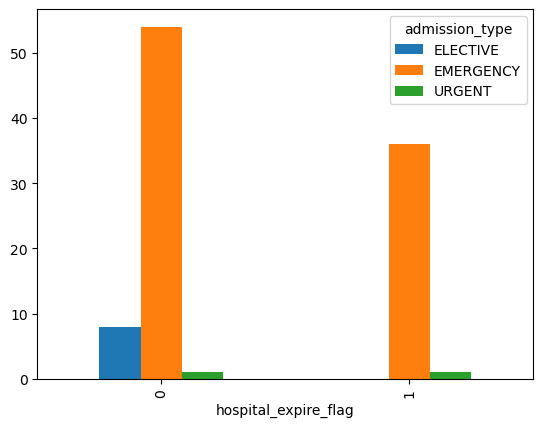

In [52]:
df_patient_ICU_admtyp = df_patient_ICU.groupby(['hospital_expire_flag','admission_type']).size().unstack().plot(kind='bar')

Text(0.5, 1.0, 'Number of death and survival patients for each type of admission')

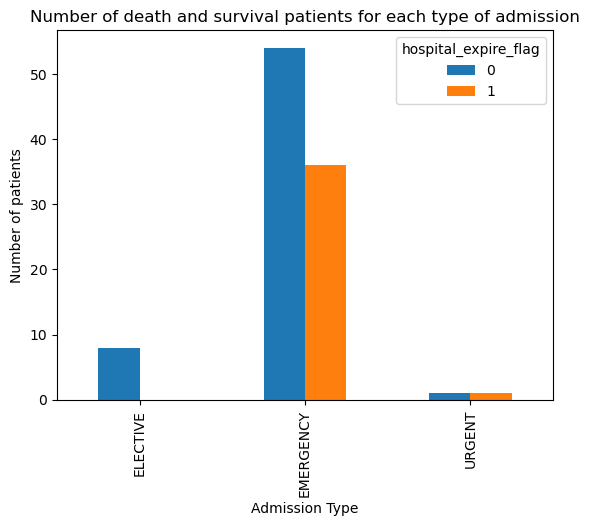

In [53]:
df_patient_ICU_admtyp = df_patient_ICU.groupby(['admission_type','hospital_expire_flag']).size().unstack().plot(kind='bar')

plt.xlabel('Admission Type')
plt.ylabel('Number of patients')
plt.title('Number of death and survival patients for each type of admission')

Insight:
 - There are no death case in elective patients, while 100% death patients is in the emergency admittion.

In [54]:
df_patient_ICU_LOS = df_patient_ICU.groupby(['last_careunit'])['total_LOS'].mean().reset_index()

df_patient_ICU_LOS

,last_careunit,total_LOS
0,CCU,202.582941
1,CSRU,187.436667
2,MICU,212.581458
3,SICU,269.574737
4,TSICU,118.013000


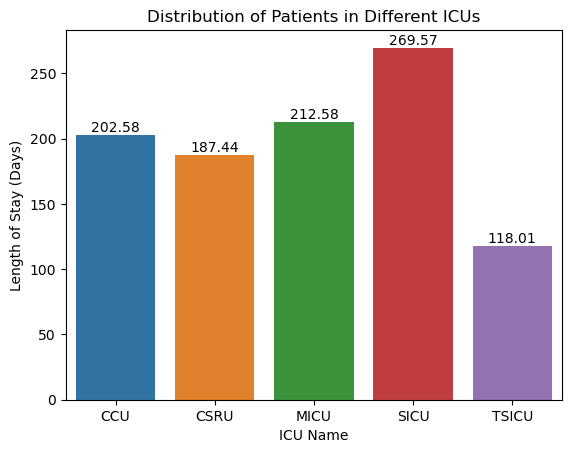

In [55]:
# Create a table to show the average Lenght of Stay ( hours) for each ICU
ax = sns.barplot(x='last_careunit', y='total_LOS', data=df_patient_ICU_LOS)

plt.xlabel('ICU Name')
plt.ylabel('Length of Stay (Days)')
plt.title('Distribution of Patients in Different ICUs')

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# SURVIVAL ANALYSIS 

In [56]:
df_patient_ICU.head()


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob,age,last_careunit,ordercategoryname
0,41976,176016,2199-01-31 22:26:00,2199-02-14 13:22:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,2136-07-28,63,MICU,Ventilation
1,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,2097-12-16,64,MICU,Non-ventilation
2,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,2061-04-10,78,SICU,Non-ventilation
3,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,alive,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,2078-06-16,45,MICU,Ventilation
4,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,FEVER,1,173.52,F,2061-03-25,68,SICU,Non-ventilation


In [57]:
# set up the time for study. Start time: the earliest time a patient admit stoptime: the last time a patient die

# time to sart study
df_patient_ICU['admittime'].min()


Timestamp('2102-08-29 07:15:00')

In [58]:
# time to end te study
df_patient_ICU[df_patient_ICU['deathtime'] != 'alive']['deathtime'].max()

Timestamp('2192-05-15 19:28:00')

In [59]:
# create a survival column 
df_patient_ICU['survival']=(df_patient_ICU['dischtime']-df_patient_ICU['admittime']).dt.days

In [60]:
df_patient_ICU.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,marital_status,ethnicity,diagnosis,hospital_expire_flag,total_LOS,gender,dob,age,last_careunit,ordercategoryname,survival
0,41976,176016,2199-01-31 22:26:00,2199-02-14 13:22:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,MARRIED,HISPANIC/LATINO - PUERTO RICAN,SEPSIS,0,326.93,M,2136-07-28,63,MICU,Ventilation,13
1,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,MARRIED,WHITE,HEADACHE,0,115.52,M,2097-12-16,64,MICU,Non-ventilation,4
2,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,DIVORCED,WHITE,SYNCOPE;TELEMETRY,0,243.50,M,2061-04-10,78,SICU,Non-ventilation,10
3,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,alive,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,SINGLE,BLACK/AFRICAN AMERICAN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,864.29,F,2078-06-16,45,MICU,Ventilation,36
4,10045,126949,2129-11-24 00:31:00,2129-12-01 01:45:00,2129-12-01 01:45:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,MARRIED,WHITE,FEVER,1,173.52,F,2061-03-25,68,SICU,Non-ventilation,7


In [61]:
# import lifline package 

from lifelines import KaplanMeierFitter

In [62]:
# Create kmf (KaplanMeier) and fit it with duration and death even( hospital_expire_flag)

kmf = lifelines.KaplanMeierFitter()

kmf.fit(df_patient_ICU['survival'],df_patient_ICU['hospital_expire_flag'])

kmf.plot_survival_function()

NameError: name 'lifelines' is not defined

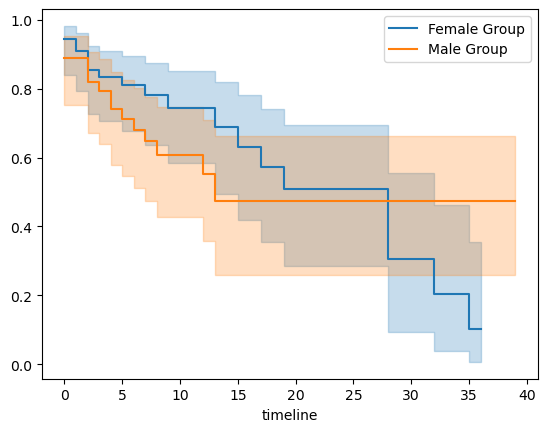

In [63]:
# survival analysis of factor gender 
ax=plt.subplot(111)
F=(df_patient_ICU['gender']=='F')

kmf =KaplanMeierFitter()

kmf.fit(df_patient_ICU[F]['survival'],df_patient_ICU[F]['hospital_expire_flag'],label='Female Group')

kmf.plot_survival_function(ax=ax)

kmf.fit(df_patient_ICU[~F]['survival'],df_patient_ICU[~F]['hospital_expire_flag'],label = 'Male Group')

kmf.plot_survival_function(ax=ax)

plt.show()

In [64]:
from lifelines.statistics import logrank_test

lrt = logrank_test(df_patient_ICU[F]['survival'],df_patient_ICU[~F]['survival'],df_patient_ICU[F]['hospital_expire_flag'],df_patient_ICU[~F]['hospital_expire_flag'])

lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.95 0.33      1.61

Base on the result : it appears that there is no substaintial gender_related difference in survival bse on the analysis conducted.

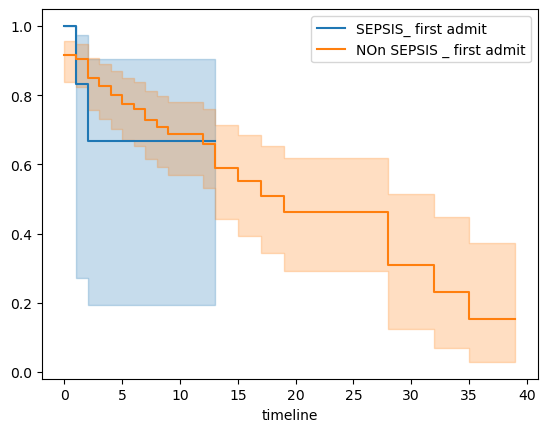

In [65]:
# survival analysis factor SEPSIS and not SEPSIS
ax= plt.subplot(111)
S=(df_patient_ICU['diagnosis']=='SEPSIS')

kmf =KaplanMeierFitter()

kmf.fit(df_patient_ICU[S]['survival'],df_patient_ICU[S]['hospital_expire_flag'],label='SEPSIS_ first admit')

kmf.plot_survival_function(ax=ax)

kmf.fit(df_patient_ICU[~S]['survival'],df_patient_ICU[~S]['hospital_expire_flag'],label = 'NOn SEPSIS _ first admit')

kmf.plot_survival_function(ax=ax)

plt.show()

In [66]:
from lifelines.statistics import logrank_test

lrt = logrank_test(df_patient_ICU[S]['survival'],df_patient_ICU[~S]['survival'],df_patient_ICU[S]['hospital_expire_flag'],df_patient_ICU[~S]['hospital_expire_flag'])

lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.10 0.75      0.41

Base on the result : it appears that there is no substaintial SEPSIS_first diagnosis_related difference in survival bse on the analysis conducted.

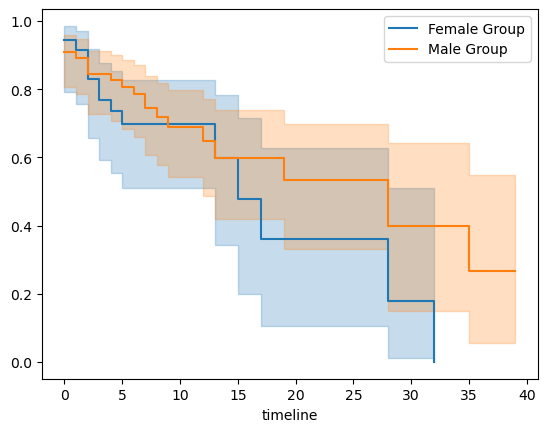

In [67]:
# survival analysis of factor age for 2 group more than 50 and below 50
ax=plt.subplot(111)
A50=(df_patient_ICU['age'] >= 80)

kmf =KaplanMeierFitter()

kmf.fit(df_patient_ICU[A50]['survival'],df_patient_ICU[A50]['hospital_expire_flag'],label='Female Group')

kmf.plot_survival_function(ax=ax)

kmf.fit(df_patient_ICU[~A50]['survival'],df_patient_ICU[~A50]['hospital_expire_flag'],label = 'Male Group')

kmf.plot_survival_function(ax=ax)

plt.show()

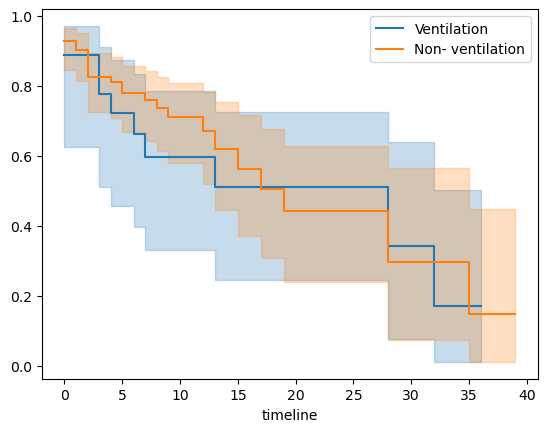

In [76]:
# survival analysis of factor age for 2 group more than 50 and below 50
ax=plt.subplot(111)
Ven = (df_patient_ICU['ordercategoryname']=='Ventilation')

kmf =KaplanMeierFitter()

kmf.fit(df_patient_ICU[Ven]['survival'],df_patient_ICU[Ven]['hospital_expire_flag'],label='Ventilation')

kmf.plot_survival_function(ax=ax)

kmf.fit(df_patient_ICU[~Ven]['survival'],df_patient_ICU[~Ven]['hospital_expire_flag'],label = 'Non- ventilation')

kmf.plot_survival_function(ax=ax)

plt.show()

In [79]:
from lifelines.statistics import logrank_test

lrt = logrank_test(df_patient_ICU[Ven]['survival'],df_patient_ICU[~Ven]['survival'],df_patient_ICU[Ven]['hospital_expire_flag'],df_patient_ICU[~Ven]['hospital_expire_flag'])

lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.26 0.61      0.71